<a href="https://colab.research.google.com/github/Bhumika1524/Python_Projects/blob/main/Neural_Network_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import 
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

#import libraries
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#load dataset
fashion_mnist = keras.datasets.fashion_mnist 

(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,23]

194

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_name = ['T-shirt/Top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankel boot']

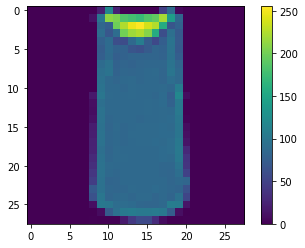

In [7]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

Data Preprocessing

In [8]:
train_images = train_images/255.0
test_images = test_images/255.0

In [9]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28, 28)),  #input layer[1]
                          keras.layers.Dense(128, activation='relu'),    #hidden layer[2]
                          keras.layers.Dense(10, activation='softmax')   #output layee[3]
])

In [13]:
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
model.fit(train_images,train_labels,epochs=1)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.1581 - accuracy: 0.9395


In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test accuracy : ',test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 0.8847
Test accuracy :  0.8847000002861023


Trouser


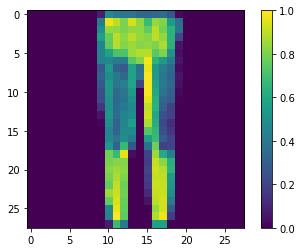

In [55]:
prediction = model.predict(test_images)
print(class_name[np.argmax(prediction[3])])
plt.figure()
plt.imshow(test_images[3])
plt.colorbar()
plt.grid(False)
plt.show()
#here you can change the index number to get respected images

Pick a number: 34


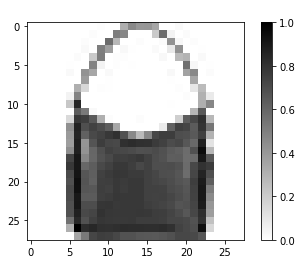

In [67]:
Colors = 'White'
plt.rcParams['text.color'] = Colors
plt.rcParams['axes.labelcolor']= Colors

def predict(model, image, correct_label):
  class_name = ['T-shirt/Top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankel boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_name[np.argmax(prediction)]
  show_image(image, class_name[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Expected :" +label)
  plt.xlabel("Guess : " +guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
 while True:
   num = input("Pick a number: ")
   if num.isdigit():
     num = int(num)
     if 0<= num <= 1000:
       return  int(num)

   else:
     print("Try Again........")

num = get_number()
image = test_images[num]
Label = test_labels[num]
predict(model, image, Label)
